In [1]:
import torchvision
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as TF
from PIL import Image
import numpy as np
train_data = torchvision.datasets.CIFAR10('./', train=True, download=True)


Files already downloaded and verified


In [2]:
idx=37490
original= train_data.data[idx]

In [23]:
def rotate_img(image, angle=None):
    if angle is None:
        angle = random.randint(-30, 30)
    image = Image.fromarray(np.uint8(image)).convert('RGB')

    image = TF.rotate(image, angle)
    return image, angle

def black_white(image):
    original=image.copy()
    image = Image.fromarray(np.uint8(image)).convert('RGB')
    image= torchvision.transforms.Grayscale()(image)
    return image, original

def jigsaw(image):
    jigsaw= image.copy()
    quad1= image[:16, :16 ,:]
    quad2= image[16:, :16, :]
    quad3= image[:16, 16: ,:]
    quad4= image[16:, 16:, :]

    jigsaw[:16, :16 ,:]= quad4
    jigsaw[16:, :16, :]= quad3
    jigsaw[:16, 16: ,:]= quad2
    jigsaw[16:, 16:, :]= quad1

    return jigsaw, image


In [42]:
plt.imshow(original)
# plt.title("Original")
plt.axis('off')
plt.savefig("/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/original.png", bbox_inches='tight')
plt.close()
plt.imshow(original)
# plt.title("Target")
plt.axis('off')
plt.savefig("/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/target.png", bbox_inches='tight')
plt.close()

In [43]:
input, output=jigsaw(original)
plt.imshow(input)
# plt.title("Input")
plt.axis('off')
plt.savefig("/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/jigsaw_input.png", bbox_inches='tight')
plt.close()

In [44]:
input, output= rotate_img(original, 90)
plt.imshow(input)
# plt.title("Input")
plt.axis('off')
plt.savefig("/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/rotation_input.png", bbox_inches='tight')
plt.close()

In [45]:
input, output= black_white(original)
plt.imshow(input, cmap="gray")
# plt.title("Input")
plt.axis('off')
plt.savefig("/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/colorization_input.png", bbox_inches='tight')
plt.close()

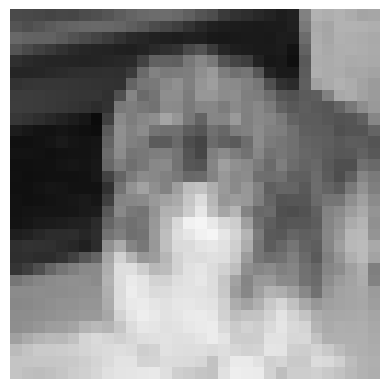

In [48]:
for idx in [38, 512, 99, 2, 411, 9248, 3851, 491, 3999]:
    original= train_data.data[idx]
    plt.imshow(original)
    # plt.title("Original")
    plt.axis('off')
    plt.savefig(f"/Users/victoriabarenne/thesis_plots/ssl_plots/no_title/{idx}.png", bbox_inches='tight')
